In [1]:
import pandas as pd

df_google = pd.read_excel('data/google1.xlsx')
df_gpt = pd.read_excel('data/chat_gpt1.xlsx')

# set id to index
df_google.set_index('ID', inplace=True)
df_gpt.set_index('ID', inplace=True)

# drop columns
df_google.drop(columns=['Email', 'Name', 'Quiz feedback'], inplace=True)
df_gpt.drop(columns=['Email', 'Name', 'Quiz feedback'], inplace=True)

# remove columns starting with "Feedback"
df_google = df_google.loc[:, ~df_google.columns.str.startswith('Feedback')]
df_gpt = df_gpt.loc[:, ~df_gpt.columns.str.startswith('Feedback')]

# only keep columns starting with "Points"
df_google = df_google.loc[:, df_google.columns.str.startswith('Points')]
df_gpt = df_gpt.loc[:, df_gpt.columns.str.startswith('Points')]

# Replace column names with the question number
df_google.columns = [f'Q{i+1}' for i in range(len(df_google.columns))]
df_gpt.columns = [f'Q{i+1}' for i in range(len(df_gpt.columns))]

# Calculate the total points
df_google['Total'] = df_google.sum(axis=1)
df_gpt['Total'] = df_gpt.sum(axis=1)


In [8]:
# Summary statistics 
print("Google")
display(df_google["Total"].describe())

print("\nGPT")
display(df_gpt["Total"].describe())


Google


count    13.000000
mean     12.461538
std       2.665064
min       8.000000
25%      11.000000
50%      13.000000
75%      15.000000
max      16.000000
Name: Total, dtype: float64


GPT


count    12.000000
mean     11.416667
std       1.621354
min       8.000000
25%      10.750000
50%      12.000000
75%      12.250000
max      13.000000
Name: Total, dtype: float64

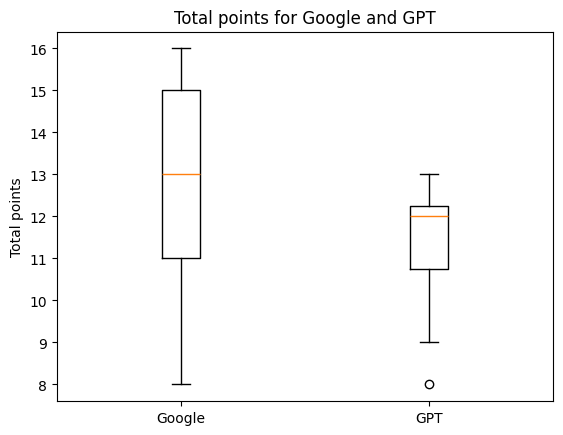

In [6]:
# Make box plot over total 
import matplotlib.pyplot as plt
plt.boxplot([df_google["Total"], df_gpt["Total"]], tick_labels=["Google", "GPT"])
plt.ylabel("Total points")
plt.title("Total points for Google and GPT")
plt.show()


In [37]:
print(df_google.iloc[:,:-1])

    Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  Q12  Q13  Q14  Q15  Q16  \
ID                                           ...                            
4    1   1   0   0   0   1   1   1   1    1  ...    0    1    1    0    0   
5    0   1   0   1   0   1   1   0   1    0  ...    0    0    1    0    1   
6    0   0   0   0   0   0   1   1   1    1  ...    0    1    1    1    1   
7    1   1   0   0   1   1   0   1   1    1  ...    0    1    1    1    1   
8    1   1   1   0   0   0   1   1   1    1  ...    1    1    1    1    0   
9    1   1   0   0   1   1   1   0   0    0  ...    0    0    1    0    1   
10   1   1   0   1   1   1   1   1   0    0  ...    0    1    1    0    1   
11   1   1   0   0   0   1   0   0   1    1  ...    0    1    1    1    1   
12   1   1   0   0   1   0   1   1   0    1  ...    0    1    1    1    1   
13   1   1   0   1   0   1   0   1   1    0  ...    1    1    0    0    1   
14   1   1   0   0   0   1   1   1   1    1  ...    0    1    1    1    1   

13


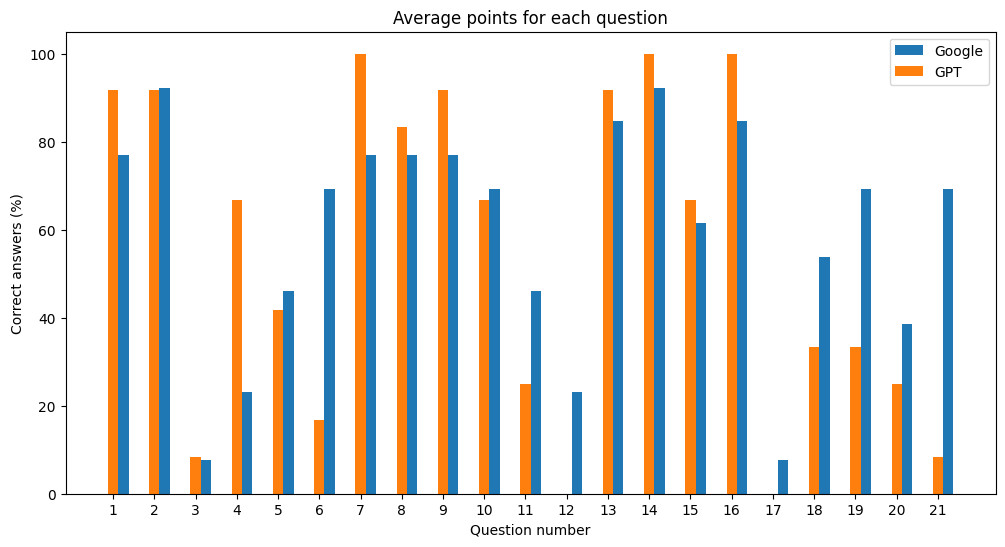

In [51]:
# Make bar plot of points in each question
import numpy as np
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(1, len(df_google.columns))

print(len(df_google.index))

ax.bar(x+0.25, df_google.iloc[:,:-1].sum(axis=0) /len(df_google.index) * 100, label="Google", width=0.25)
ax.bar(x, df_gpt.iloc[:,:-1].sum(axis=0) /len(df_gpt.index) * 100, label="GPT", width=0.25)
ax.set_xticks(x)
ax.set_xlabel("Question number")
ax.set_ylabel("Correct answers (%)")
ax.set_title("Average points for each question")
ax.legend()

plt.show()